In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv('resultmod.csv', sep=',', delimiter=None)
df

,frame #,xmin,ymin,xmax,ymax,confidence,class,name
0,2001,0.000000,0.000000,0.000000,0.000000,0.000000,0,ball
1,2002,713.950928,419.075897,728.133667,432.829437,0.315437,0,ball
2,2003,0.000000,0.000000,0.000000,0.000000,0.000000,0,ball
3,2004,716.057861,423.124084,733.775269,440.342834,0.278228,0,ball
4,2005,717.061218,426.749481,734.829895,444.326752,0.270284,0,ball
...,...,...,...,...,...,...,...,...
95,2096,1011.433777,421.529755,1034.276001,442.839569,0.315944,0,ball
96,2097,1019.684387,425.853699,1042.442627,447.340454,0.276346,0,ball
97,2098,1027.548828,431.082977,1051.207764,453.281097,0.305884,0,ball
98,2099,0.000000,0.000000,0.000000,0.000000,0.000000,0,ball


In [6]:
df3 = pd.read_csv('resultpred.csv', sep=',', delimiter=None)
df3

,xmin,ymin,xmax,ymax,confidence,class,name
0,713.950928,419.075897,728.133667,432.829437,0.315437,0,ball
1,716.057861,423.124084,733.775269,440.342834,0.278228,0,ball
2,717.061218,426.749481,734.829895,444.326752,0.270284,0,ball
3,719.094971,430.642303,736.346558,447.648407,0.290652,0,ball
4,720.056335,434.546997,738.221252,452.592957,0.314930,0,ball
...,...,...,...,...,...,...,...
61,1003.851990,417.627594,1026.871216,439.120270,0.294052,0,ball
62,1011.433777,421.529755,1034.276001,442.839569,0.315944,0,ball
63,1019.684387,425.853699,1042.442627,447.340454,0.276346,0,ball
64,1027.548828,431.082977,1051.207764,453.281097,0.305884,0,ball


In [7]:
df2 = pd.read_csv('GroundTruth.csv', sep=',', delimiter=None)
df2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,710,418,15,14,left002001.png,1280,720
1,ball,715,419,16,15,left002002.png,1280,720
2,ball,716,422,15,14,left002003.png,1280,720
3,ball,717,423,15,15,left002004.png,1280,720
4,ball,720,428,15,14,left002005.png,1280,720
...,...,...,...,...,...,...,...,...
95,ball,1015,428,16,13,left002096.png,1280,720
96,ball,1026,430,16,15,left002097.png,1280,720
97,ball,1033,435,17,17,left002098.png,1280,720
98,ball,1043,441,16,14,left002099.png,1280,720


In [15]:
x1 = df2['bbox_x']
y1 = df2['bbox_y']
x2 = df['xmin']
y2 = df['ymin']

In [30]:
xval = abs(df['xmin'] - df2['bbox_x'])
yval = abs(df['ymin'] - df2['bbox_y'])
# v = []
e = 0
for i in range(len(x1)):
    e += math.sqrt(abs((x2[i]-x1[i])**2 - (y2[i]-y1[i])**2))
print(e/100)   
# f = pd.DataFrame(v)
# f

241.37283410123695


In [27]:
ade = (np.sum(v))/len(x1)
ade

241.37283410123695

In [18]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x2,y2))
    ground_coordinates = list(zip(x1,y1))
    count += 1

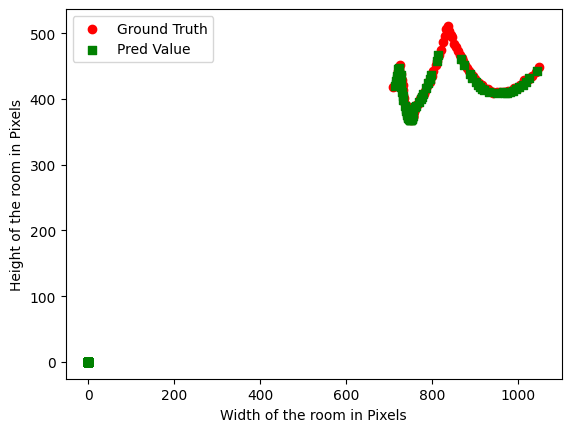

In [19]:
from matplotlib import markers
plt.scatter(x1, y1, marker='o', color='red', label='Ground Truth')
plt.scatter(x2, y2, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [20]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]

error = avg_displacement_error(predicted_coordinates, ground_coordinates)
print(error)


322.54625141917967


In [28]:
len(predicted_coordinates)

100

In [21]:
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)


In [22]:
error = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
print(error)

4.614153639979188


In [31]:
import numpy as np

def final_displacement_error(true_params, estimated_params):
    A, w = true_params
    A_est, w_est = estimated_params
    T = 2 * np.pi / w
    x_true = A * np.cos(w * T)
    x_est = A_est * np.cos(w_est * T)
    error = x_true - x_est
    return error


In [34]:
error = final_displacement_error(predicted_coordinates[99],ground_coordinates[99])
print(error)

-0.8126648537422625
